README FILE

```markdown
# Sentiment Analysis of Kindle Reviews

This project implements a sentiment analysis model for Kindle reviews using the Fastai library and a text classification approach based on the AWD-LSTM model. The model classifies reviews into three sentiment categories: negative, neutral, and positive.

## Table of Contents
- [Introduction](#introduction)
- [Installation](#installation)
- [Dataset](#dataset)
- [Usage](#usage)
- [Model Training](#model-training)
- [Results](#results)
- [Acknowledgments](#acknowledgments)

## Introduction

This project focuses on analyzing customer sentiments from Kindle reviews. By employing machine learning techniques, the goal is to categorize reviews into different sentiment classes, providing insights into user experiences with Kindle products.

## Installation

To run this project, ensure you have the following libraries installed:

```bash
pip install fastai
pip install pandas
pip install scikit-learn
```

## Dataset

The dataset used for this project is a collection of Kindle reviews, which includes columns for the review text and corresponding ratings. The ratings have been transformed into sentiment categories as follows:
- Ratings 1 and 2: Negative
- Rating 3: Neutral
- Ratings 4 and 5: Positive

## Usage

Load the dataset:

```python
import pandas as pd

df = pd.read_csv('path/to/kindle_reviews.csv')
```

Preprocess the data by cleaning text and classifying sentiments. Create DataLoaders for training and validation:

```python
from fastai.text.all import *

dls = TextDataLoaders.from_df(
    df,
    text_col='reviewText',
    label_col='sentiment',
    valid_pct=0.2,
    bs=16
)
```

Initialize the learner and train the model:

```python
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fit_one_cycle(10)
```

## Model Training

The model is trained using a one-cycle learning rate policy for optimal performance. The training process includes freezing and unfreezing layers to fine-tune the learning:

```python
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2))
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3))
```

## Results

The model's performance can be evaluated using metrics such as precision, recall, and F1-score. Example classification results are as follows:

```
              precision    recall  f1-score   support

    negative       0.90      0.78      0.84        36
     neutral       0.00      0.00      0.00         8
    positive       0.74      0.86      0.79        36

    accuracy                           0.74        80
   macro avg       0.55      0.55      0.54        80
weighted avg       0.74      0.74      0.73        80
```

## Acknowledgments

- Fastai documentation for providing excellent resources for model training.
- Contributors and maintainers of the libraries used in this project.

Import Fastext as Fastai to replicate the  code  for  ULimFit on new dataset

In [50]:
!pip install fastai

This code imports all modules and functions from the fastai.text.all library for natural language processing tasks, and it imports the pandas library as pd for data manipulation and analysis.

In [51]:
from fastai.text.all import *
import pandas as pd

This code imports the os module and then prints a list of all files and directories in the /kaggle/input directory, typically used to display the contents of an input dataset folder in a Kaggle environment.

In [52]:
import os
print(os.listdir("/kaggle/input"))

['amazon-kindle-review']


This code will list all files and directories in the /kaggle/input/amazon-kindle-review directory, showing the contents of the Amazon Kindle Review dataset folder

In [53]:
import os
print(os.listdir("/kaggle/input/amazon-kindle-review"))

['preprocessed_kindle_review .csv']


This part restricts the dataset to only 1000rows

In [54]:
import pandas as pd

# Load the preprocessed dataset into a DataFrame
df = pd.read_csv("/kaggle/input/amazon-kindle-review/preprocessed_kindle_review .csv")  # Adjust the filename if needed

# Restrict to the first 1000 records
df_restricted = df.head(1000)

# Display the first few rows of the restricted DataFrame
print(df_restricted.head())

   Unnamed: 0  rating  \
0           0       5   
1           1       1   
2           2       5   
3           3       5   
4           4       5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                reviewText  \
0                                                                                                                                                                                                                                                  

This code imports the train_test_split function from sklearn.model_selection and then splits the DataFrame df_restricted into training and testing sets. It uses an 80-20 split, where 80% of the data is allocated to train_df and 20% to test_df. The random_state=42 ensures that the split is reproducible. Here, rating is assumed to be the label column, and reviewText is the text column containing the reviews.

In [55]:
from sklearn.model_selection import train_test_split

# Split the restricted dataset (assuming 'rating' is the label and 'reviewText' is the text column)
train_df, test_df = train_test_split(df_restricted, test_size=0.2, random_state=42)  # 80% train, 20% test

This code defines and applies a function to classify review ratings into sentiment labels, adds the labels to training and test datasets, and saves the results:

classify_sentiment Function: This function classifies a review rating as:

'negative' if the rating is 1 or 2,
'neutral' if the rating is 3,
'positive' if the rating is 4 or 5.
Applying the Function: The classify_sentiment function is applied to the 'rating' column in both train_df and test_df to create a new 'sentiment' column with the corresponding sentiment label.

Display: Prints the first five rows of the train_df and test_df DataFrames, showing the original rating and the new sentiment columns.

Save to CSV: Exports the modified train_df and test_df DataFrames to CSV files named 'train_kindle_reviews_classified.csv' and 'test_kindle_reviews_classified.csv'.

In [56]:
# Step 4: Define a function to classify ratings into sentiment
def classify_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

# Step 5: Apply the classification function to the 'rating' column
train_df['sentiment'] = train_df['rating'].apply(classify_sentiment)
test_df['sentiment'] = test_df['rating'].apply(classify_sentiment)

# Optional: Display the modified DataFrames (first 5 records)
print("Training Set Sentiment Classification:")
print(train_df[['rating', 'sentiment']].head())

print("\nTest Set Sentiment Classification:")
print(test_df[['rating', 'sentiment']].head())

# Step 6: Save the modified datasets to new CSV files
train_df.to_csv('train_kindle_reviews_classified.csv', index=False)
test_df.to_csv('test_kindle_reviews_classified.csv', index=False)

Training Set Sentiment Classification:
     rating sentiment
29        5  positive
535       4  positive
695       1  negative
557       1  negative
836       2  negative

Test Set Sentiment Classification:
     rating sentiment
521       5  positive
737       5  positive
740       1  negative
660       4  positive
411       4  positive


This line of code creates a TextDataLoaders object, dls, for training a natural language processing model using the fastai library. It does the following:

from_df method: Creates a TextDataLoaders object directly from a DataFrame, train_df.
Parameters:
text_col='reviewText': Specifies that the reviewText column contains the text data (the review text).
label_col='sentiment': Specifies that the sentiment column contains the labels (sentiment classification).
valid_pct=0.2: Reserves 20% of the data as the validation set, while the remaining 80% is used for training.
The resulting dls object can now be used for model training and validation.

In [57]:
dls = TextDataLoaders.from_df(train_df, text_col='reviewText', label_col='sentiment', valid_pct=0.2)

The dls.show_batch() command displays a sample batch of text data from the dls data loader. This includes a preview of the reviewText entries (input text) and their corresponding sentiment labels (target labels). This helps verify that the data is correctly prepared for training by showing the format and structure of the data batches that will be fed into the model

In [58]:
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've read several of xxmaj xxunk 's books over several series . xxmaj before reading this volume , i had read every other volume of this series ( except the xxunk 1 , vol . 7 ; it had not been published when i finished reading the other 5 ) . i had not read this one , because i did n't think the books needed to be read in sequence and the summary for this one just did n't interest me enough to want to read it . xxmaj since i thought 7 xxunk more than what i wanted to pay , and xxmaj i 'd been waiting for several months , a year at least i think , for her to finish the series , because vol . 6 actually ended with a cliff xxunk - i decided to just go ahead and read this",negative
1,"xxbos xxunk xxunk xxup bell xxup blues can be read on it 's own , but i would not recommend it - as the personalities that i know and love takes a back seat to the drama of the wedding in this second book , but they creep in every now and again and without reading the first book , you will definately be missing xxunk book starts off with small town xxmaj konigsburg xxunk for the wedding of the year , now that xxmaj docia has agreed to marry xxmaj cal . xxmaj as with all not normal wedding with a xxunk mother of the bride - everything went xxunk and larger than life and it is only with the xxunk of xxmaj docia best xxunk xxunk xxmaj janie xxmaj xxunk is she able to survive the day to day angst of her xxunk is sweet , really sweet",positive
2,"xxbos xxmaj dylan xxmaj xxunk is a xxunk werewolf who spent years under a xxunk alpha who enjoyed nothing more than hurting others . xxmaj it is n't until his friends and new home is xxunk by xxmaj xxunk xxmaj xxunk does he finally take a stand and kill his former pack leader . xxmaj even now in is new home of xxmaj red xxmaj rock and under a much more kind alpha , xxmaj dylan is still xxunk by is inner scars from his previous life . xxmaj he does not just want to sit around and be taken care of by others but wants to help and be of xxunk xxmaj xxunk xxunk as her xxunk was xxunk murdered and left with a few scars of her own but it 's the ones that she ca n't see that hurt her more . xxmaj the xxunk of xxmaj",positive
3,"xxbos xxmaj beautiful xxmaj demons is the second book by xxmaj xxunk xxmaj xxunk i have read . i did n't love the first one , xxmaj the xxmaj trouble xxmaj with xxmaj xxunk , but i realized i already had this book , and in some reviews for xxup xxunk the reviewers stated they liked this series much better , so i thought i would give it a try . xxmaj while i did like it better than the first book , it still was n't amazing . i will , however , read the second book once i get through some of my library xxunk xxmaj demons starts off with xxmaj harper being sent to another xxunk home . xxmaj this is her last chance . xxmaj she knows there is something different about her , but she tries to keep that secret for good reason . xxmaj",negative
4,"xxbos xxmaj maybe xxmaj i 'm not as xxunk as the other reviewers , but i really did n't xxunk this hero . xxmaj maybe xxmaj i 'm xxunk and too romantic , but i really wish i had known that not 6 hours after taking h 's virginity , the hero would be xxunk his ex ( maybe not so ex ) xxunk i first started the book , i was enjoying the xxmaj xxunk xxmaj jones feel of the xxunk , awkward heroine , but the hero was no xxmaj mr . xxmaj xxunk . xxmaj when h first meets xxup h , he 's wearing a xxunk that xxunk xxmaj xxunk xxmaj no xxmaj xxunk . xxmaj what guy wears that ? i had to check to make sure this guy was really the xxup h. xxmaj he 's cold and even mean to her in the",negative
5,"xxbos i really do enjoy xxmaj troy xxmaj denning 's work , i want everyone who reads this review to know this . i loved xxmaj star by xxmaj star and i very much enjoyed xxmaj xxunk xxmaj ghost . xxmaj this book "" a xxmaj forest xxmaj apart "" was n't on par with his other works . xxmaj it was n't without it 's xxunk , but it had things in it that i did n't


This code initializes a text classification model using the fastai library:

text_classifier_learner: This function creates a learner object, learn, for training a text classifier.

Parameters:

dls: The TextDataLoaders object, which supplies the text data and labels.
AWD_LSTM: Specifies the architecture, in this case, the AWD_LSTM model, which is an LSTM-based architecture optimized for text classification.
drop_mult=0.5: Sets the dropout multiplier to 0.5, which helps prevent overfitting by randomly "dropping out" parts of the model during training.
metrics=accuracy: Specifies accuracy as the metric to evaluate the model's performance.
This learn object is now ready for training with the fit or fine_tune method

In [59]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

This code trains the text classifier by fine-tuning the model for 8 epochs:

fine_tune: This method fine-tunes the model, typically starting from a pretrained language model.

Parameters:

8: Specifies the number of epochs, or complete passes through the training data.
1e-2: Sets the learning rate to 0.01, which controls the step size in updating model weights.
The model will iteratively improve its accuracy by adjusting weights based on the training data.

In [60]:
learn.fine_tune(8, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.081885,0.967615,0.693750,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.786931,0.872388,0.681250,00:05
1,0.717453,0.791598,0.687500,00:05
2,0.634586,0.739528,0.687500,00:05
3,0.560404,0.817270,0.681250,00:05
4,0.473373,0.815675,0.650000,00:05
5,0.397595,0.977206,0.600000,00:05
6,0.336766,0.922405,0.650000,00:05
7,0.288657,0.921546,0.675000,00:05


The learn.show_results() command displays the model's predictions alongside the actual labels for a batch of data from the validation set. This output includes:

Input text: The review text (from reviewText) used as input to the model.
Predicted labels: The sentiment classifications predicted by the model.
Actual labels: The true sentiment labels from the dataset.
This comparison helps assess how well the model is performing by giving a clear view of its successes and errors in prediction.

In [61]:
learn.show_results()

,text,category,category_
0,"xxbos * * possible xxmaj spoilers * * xxmaj if i had to review this book in one word it would be ' ridiculous ' . i had high hopes the first few pages as the initial crime xxunk . i went into it willing to suspend belief about a xxunk using that xxunk as a cover for her real job as a xxup cia agent . xxmaj when i read xxmaj jaclyn 's back story about her parents and her near xxunk i thought , "" h xxrep 3 m … this is intriguing . xxunk too long though it became xxunk that this book was going to xxunk due to xxunk xxunk guys , silly xxunk type xxunk , and a plot whose xxunk you could xxunk a plane xxunk could have been an interesting thriller was anything but . xxmaj the villain of the piece was presented",negative,negative
1,"xxbos xxmaj you xxmaj can xxmaj leave xxmaj your xxmaj xxunk xxmaj on is what the title promised , a naughty little novella on a stripper and his lover . xxmaj the starting point of the story is one i already see in the past , a young and handsome xxmaj college xxup xxunk , xxmaj harlan , who has the xxunk for his even more handsome , a slightly older , xxmaj college professor , xxmaj sawyer . xxmaj the book xxunk the rules of a xxmaj may / xxmaj xxunk romance plus the xxmaj college setting with an xxmaj office xxmaj xxunk theme … the xxunk the thing , this is the xxunk romance by the rule , with the twist of being a gay romance . xxmaj so i would say that it can appeal both to the old fan of the gay romance than to a",positive,neutral
2,"xxbos xxmaj let me start this review off by saying that no one , and i mean xxup no xxup one can write for xxmaj boba xxmaj fett as well as xxmaj karen xxmaj xxunk can . xxmaj when i saw this book on xxmaj amazon i was delighted and i was even more excited when i found out that she wrote it ! xxrep 3 * xxup spoilers xxrep 3 * xxrep 3 * xxup spoilers xxrep 3 * xxrep 3 * xxup spoilers xxrep 3 * i knew from the xxmaj star xxmaj wars xxunk that the xxmaj mandalorians were involved in the xxmaj vong xxmaj war during their xxunk and that they xxunk alongside them against the xxmaj new xxmaj republic . xxmaj but this e - book really helped fill in the gaps that the xxunk and the novels left . i knew they were n't",positive,negative
3,"xxbos xxmaj after reading ' knowing xxmaj xxunk ' which i absolutely loved , i decided to explore more of this author 's work . xxunk did n't xxunk the way the first book did . i had a few problems . xxmaj ren and xxmaj cade come together fairly early in the book which was fine , but then the sex got repetitive and plot took a xxunk for a few chapters . xxmaj ren and xxmaj cade were xxunk strong and insecure / xxunk , sometimes all within a matter of sentences . xxmaj sometimes i could n't figure exactly what they were xxunk over as the conclusion they would draw from each other 's actions did n't seem xxunk . xxmaj the angst just seemed to be xxunk and drawn out for no good reason . xxmaj cade 's xxunk / xxunk to forgive xxmaj ren 's",neutral,negative
4,xxbos i just had to xxunk this review . xxmaj this book is an ( i believe i got this right ) an xxunk re - write . xxmaj thank god i did n't get the first version . xxmaj it has moved into xxup my top 5 favorite . xxmaj he ( bechett xxunk ) is also in my top 5 xxmaj hero / xxunk xxunk xxunk expect to like it . xxmaj seemed a little too xxunk . xxwrep 3 xxunk . i xxunk loved it . xxmaj matter of fact xxmaj i 'm over 21 … well over 21 … ran my xxunk dead .. now you know what xxunk .. i am xxunk my reading xxunk and buying anything xxmaj xxunk xxmaj barrett writes . xxup an xxup absolute xxup keeper ( with a large supply of xxunk for once the cover of that xxunk xxunk,positive,negative
5,"xxbos xxmaj xxunk xxmaj property by xxmaj leah xxmaj xxunk is the first book in the xxmaj xxunk xxmaj security series . xxmaj it is also xxmaj leah 's first published work and i enjoyed it so much i knew xxmaj i 'd read anything future she published . xxmaj the characters are interesting 

The learn.predict("I really liked that movie!") command uses the trained text classification model to make a sentiment prediction for the given input text ("I really liked that movie!"). The output will typically include:

Predicted label: The sentiment classification (e.g., 'positive', 'negative', or 'neutral').
Predicted probabilities: The model's confidence scores for each possible class.
Input text: The original input that was analyzed.
This allows you to see how the model interprets the sentiment of the provided text.

In [62]:
learn.predict("I really liked that movie!")

('positive', tensor(2), tensor([4.9671e-04, 1.7732e-04, 9.9933e-01]))

The two lines of code serve the following purposes:

print(train_df.dtypes): This prints the data types of each column in the train_df DataFrame. It helps you understand what types of data you are working with (e.g., integers, floats, strings, etc.).

print(train_df['reviewText'].apply(type).value_counts()): This line applies the type function to each entry in the 'reviewText' column to determine the type of each review (e.g., str for strings). It then counts how many entries of each type are present in that column and prints the results. This is useful for confirming that all entries in the 'reviewText' column are of the expected type (typically strings for text data).

In [63]:
print(train_df.dtypes)
print(train_df['reviewText'].apply(type).value_counts())


Unnamed: 0     int64
rating         int64
reviewText    object
summary       object
sentiment     object
dtype: object
reviewText
<class 'str'>    800
Name: count, dtype: int64


The two lines of code perform text preprocessing on the 'reviewText' column of the train_df DataFrame:

train_df['reviewText'] = train_df['reviewText'].str.replace('\n', ' '): This replaces any newline characters (\n) in the review text with a space. This is helpful for ensuring that the text is formatted correctly and does not contain unwanted line breaks, which could interfere with model training.

train_df['reviewText'] = train_df['reviewText'].str.strip(): This removes any leading or trailing whitespace from the review text. This ensures that there are no extra spaces at the beginning or end of the reviews, which could affect text processing and model performance.

These steps help clean the text data, making it more suitable for analysis and model training.

In [64]:
train_df['reviewText'] = train_df['reviewText'].str.replace('\n', ' ')  # Replace newline characters
train_df['reviewText'] = train_df['reviewText'].str.strip()  # Strip leading/trailing whitespace


These lines of code perform a cleanup operation on the 'sentiment' column of the train_df DataFrame:

train_df['sentiment'] = train_df['sentiment'].str.strip(): This line removes any leading or trailing whitespace from the sentiment labels. This is important to ensure that there are no extra spaces around the labels, which could lead to issues when analyzing or using the data.

print(train_df['sentiment'].unique()): This line prints the unique values present in the 'sentiment' column after the cleanup. It allows you to verify the distinct sentiment categories in the dataset (e.g., 'positive', 'neutral', 'negative') and ensures that they are formatted correctly without any unintended whitespace.

In [65]:
train_df['sentiment'] = train_df['sentiment'].str.strip()  # Strip spaces
print(train_df['sentiment'].unique()) 

['positive' 'negative' 'neutral']


The line of code print(train_df[['reviewText', 'sentiment']].head()) displays the first five rows of the specified columns ('reviewText' and 'sentiment') from the train_df DataFrame.

This allows you to:

Verify Data: Check that the review texts and their corresponding sentiment labels are correctly aligned and formatted after any preprocessing.
Understand Data Structure: Get a quick overview of the data you're working with, including examples of the reviews and their classified sentiments.
This step is useful for confirming that the data preparation steps have been successful and that the data is ready for model training or further analysis.

In [66]:
print(train_df[['reviewText', 'sentiment']].head())  # Check specific columns


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  reviewText  \
29   I have read tons of books, and this is one of the best books I've ever read! Imagine the concept of a hitch-hiking serial killer being picked up by a serial killer! It's hilarious! I've read all the versions and prequels and sequels that Kilborn and Crouch wrote about these characters, and let me tell you they are all great! They have some really twisted minds, and I love that. Kinda reminds me of myself lol. Keep it up you two, because I want to read more of your stuff! And don

The line of code print(train_df['sentiment'].unique()) displays all the unique sentiment labels present in the 'sentiment' column of the train_df DataFrame. This is useful for:

Identifying Categories: Confirming the distinct sentiment classifications available in your dataset (e.g., 'positive', 'neutral', 'negative').
Checking Data Integrity: Ensuring that the sentiment labels have been properly assigned and formatted without any unintended duplicates or whitespace.
Running this command helps you understand the range of sentiments your model will be working with during training and evaluation.

In [67]:
print(train_df['sentiment'].unique())


['positive' 'negative' 'neutral']


This line of code performs two operations on the 'sentiment' column of the train_df DataFrame:

train_df['sentiment'].str.strip(): This removes any leading or trailing whitespace from each sentiment label, ensuring that there are no extra spaces around the labels.

.astype(str): This converts the cleaned sentiment labels to string type. This ensures that all entries in the 'sentiment' column are of the same type, which is important for consistency when processing or analyzing the data.

By executing this line, you ensure that the sentiment labels are correctly formatted and that all values are strings, making the data ready for further analysis or modeling tasks.

In [68]:
train_df['sentiment'] = train_df['sentiment'].str.strip().astype(str)


The line of code print(train_df['sentiment'].dtype) outputs the data type of the 'sentiment' column in the train_df DataFrame.

If the output shows dtype('O') or object, it confirms that the column contains string values, which is expected for sentiment labels.
This step is useful for verifying that the data type is correct after any preprocessing steps and ensuring consistency in the data format before proceeding with further analysis or model training

In [69]:
print(train_df['sentiment'].dtype)  # Should be 'object'


object


This code creates a DataBlock object named kindle, which is designed for processing text data and preparing it for training a classification model. Here’s a breakdown of its components:

DataBlock: A flexible way to define a data pipeline in fastai, specifying how to get data and what transformations to apply.

blocks: This parameter defines the types of data blocks:

TextBlock.from_df('reviewText', seq_len=72): This creates a text block from the reviewText column of a DataFrame, with sequences of length 72. This means that the text will be tokenized and padded or truncated to this length.
CategoryBlock: This indicates that the target variable is categorical (in this case, the rating).
get_y=ColReader('rating'): This specifies that the target labels (y-values) will be taken from the rating column of the DataFrame.

splitter=RandomSplitter(): This defines how to split the data into training and validation sets. The RandomSplitter will randomly divide the data, ensuring that both sets are representative of the overall dataset.

This kindle DataBlock can now be used to create data loaders for training and validating a text classification model.

In [70]:
kindle = DataBlock(
    blocks=(TextBlock.from_df('reviewText', seq_len=72), CategoryBlock),
    get_y=ColReader('rating'),  # Ensure 'rating' is a valid column
    splitter=RandomSplitter()
)

This code attempts to create data loaders from the kindle DataBlock using the train_df DataFrame, with a batch size of 32. Here's a breakdown of what happens:

dls = kindle.dataloaders(train_df, bs=32): This line calls the dataloaders method on the kindle DataBlock to generate data loaders for the training and validation datasets. The bs=32 argument sets the batch size to 32, meaning that each batch will contain 32 samples.

try ... except Exception as e:: This structure is used to handle any potential errors that may occur during the creation of the data loaders. If an error occurs, it will be caught and printed.

print(f"Error: {e}"): If an exception is raised, this line will output the error message, allowing you to diagnose any issues that arise during the data loading process.

Running this code will either successfully create the data loaders or print an error message if something goes wrong, such as a mismatch in the expected column names or data types.

In [71]:
try:
    dls = kindle.dataloaders(train_df, bs=32)
except Exception as e:
    print(f"Error: {e}")

Error: unhashable type: 'L'


This code creates TextDataLoaders for language modeling from the train_df DataFrame and displays a sample batch:

TextDataLoaders.from_df(...): Generates data loaders with the following settings:

text_col='reviewText': Uses the reviewText column for text.
label_col='sentiment': Uses the sentiment column for labels.
valid_pct=0.1: Reserves 10% of the data for validation.
bs=8: Sets the batch size to 8.
seq_len=72: Limits sequence length to 72 tokens.
dls_lm.show_batch(max_n=5): Displays up to 5 examples from the batch to verify the setup.

This process ensures the data loaders are configured correctly for training.

In [72]:
# Create TextDataLoaders from the DataFrame
dls_lm = TextDataLoaders.from_df(
    train_df, 
    text_col='reviewText', 
    label_col='sentiment', 
    valid_pct=0.1, 
    bs=8, 
    seq_len=72
)

# Display a batch to verify the setup
dls_lm.show_batch(max_n=5)


,text,category
0,"xxbos xxmaj i 've read several of xxmaj xxunk 's books over several series . xxmaj before reading this volume , i had read every other volume of this series ( except the xxunk 1 , vol . 7 ; it had not been published when i finished reading the other 5 ) . i had not read this one , because i did n't think the books needed to be read in sequence and the summary for this one just did n't interest me enough to want to read it . xxmaj since i thought 7 xxunk more than what i wanted to pay , and xxmaj i 'd been waiting for several months , a year at least i think , for her to finish the series , because vol . 6 actually ended with a cliff xxunk - i decided to just go ahead and read this",negative
1,"xxbos xxmaj maybe xxmaj i 'm not as xxunk as the other reviewers , but i really did n't xxunk this hero . xxmaj maybe xxmaj i 'm xxunk and too romantic , but i really wish i had known that not 6 hours after taking h 's virginity , the hero would be xxunk his ex ( maybe not so ex ) xxunk i first started the book , i was enjoying the xxmaj xxunk xxmaj jones feel of the xxunk , awkward heroine , but the hero was no xxmaj mr . xxmaj xxunk . xxmaj when h first meets xxup h , he 's wearing a xxunk that xxunk xxmaj xxunk xxmaj no xxmaj xxunk . xxmaj what guy wears that ? i had to check to make sure this guy was really the xxup h. xxmaj he 's cold and even mean to her in the",negative
2,"xxbos * * possible xxmaj spoilers * * xxmaj if i had to review this book in one word it would be ' ridiculous ' . i had high hopes the first few pages as the initial crime xxunk . i went into it willing to suspend belief about a xxunk using that xxunk as a cover for her real job as a xxup cia agent . xxmaj when i read xxmaj jaclyn 's back story about her parents and her near xxunk i thought , "" h xxrep 3 m … this is intriguing . xxunk too long though it became xxunk that this book was going to xxunk due to xxunk xxunk guys , silly xxunk type xxunk , and a plot whose xxunk you could xxunk a plane xxunk could have been an interesting thriller was anything but . xxmaj the villain of the piece was presented",negative
3,"xxbos xxmaj you xxmaj can xxmaj leave xxmaj your xxmaj xxunk xxmaj on is what the title promised , a naughty little novella on a stripper and his lover . xxmaj the starting point of the story is one i already see in the past , a young and handsome xxmaj college xxup xxunk , xxmaj harlan , who has the xxunk for his even more handsome , a slightly older , xxmaj college professor , xxmaj sawyer . xxmaj the book xxunk the rules of a xxmaj may / xxmaj xxunk romance plus the xxmaj college setting with an xxmaj office xxmaj xxunk theme … the xxunk the thing , this is the xxunk romance by the rule , with the twist of being a gay romance . xxmaj so i would say that it can appeal both to the old fan of the gay romance than to a",positive
4,"xxbos xxmaj xxunk xxmaj property by xxmaj leah xxmaj xxunk is the first book in the xxmaj xxunk xxmaj security series . xxmaj it is also xxmaj leah 's first published work and i enjoyed it so much i knew xxmaj i 'd read anything future she published . xxmaj the characters are interesting , the dialog engaging , and the sex scenes are hot . xxmaj what truly xxunk me though was the fact that this book takes place less than a half of a xxunk from my home and she described it xxunk book xxunk around xxmaj mark xxmaj xxunk and xxmaj jodi xxmaj xxunk . xxmaj mark is the owner of xxmaj xxunk xxmaj security xxunk in xxmaj texas and xxmaj jodi one of his xxunk . xxmaj the book xxunk with xxmaj jodi xxunk out a home she is suppose to break into to prove to",positive


This code snippet sets an environment variable to configure CUDA memory allocation for PyTorch:

import os: Imports the operating system module, which allows interaction with the system’s environment variables.

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True': This line sets the PYTORCH_CUDA_ALLOC_CONF environment variable to enable expandable segments in CUDA memory allocation. This configuration can help optimize GPU memory usage by allowing PyTorch to expand memory segments as needed, potentially reducing fragmentation and improving performance during model training or inference on GPUs.

Overall, this setup is useful when working with deep learning models in PyTorch on a GPU to enhance memory management.

In [73]:
import os


# Set the environment variable for CUDA allocation
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

This code provides insights into the train_df DataFrame by performing three operations:

print(train_df.shape): This command outputs the dimensions of the DataFrame, showing the number of rows and columns (e.g., (num_rows, num_columns)).

print(train_df.info()): This line displays a summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage. This information is useful for understanding the structure and completeness of the data.

print(train_df.head()): This command shows the first five rows of the DataFrame, allowing you to quickly inspect the data and see how the reviews and sentiment labels are structured.

Together, these commands help you verify the dataset's shape, understand its structure, and visually inspect the data.

In [74]:
print(train_df.shape)  # Check the number of rows and columns
print(train_df.info())  # Get info on data types
print(train_df.head())  # View the first few rows


(800, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  800 non-null    int64 
 1   rating      800 non-null    int64 
 2   reviewText  800 non-null    object
 3   summary     800 non-null    object
 4   sentiment   800 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.5+ KB
None
     Unnamed: 0  rating  \
29           29       5   
535         535       4   
695         695       1   
557         557       1   
836         836       2   

                                                                                                                                                                                                                                                                                                                                                                                                        

This code performs two checks on the train_df DataFrame:

print(train_df['reviewText'].isnull().sum()): This command calculates and prints the total number of null (missing) values in the 'reviewText' column. This check is important to ensure that there are no missing reviews that could affect model training or evaluation.

print(train_df['sentiment'].unique()): This line retrieves and prints the unique values present in the 'sentiment' column. This helps you verify the distinct sentiment categories (e.g., 'positive', 'neutral', 'negative') and ensures that the sentiment labels are correctly assigned without duplicates or unexpected values.

Together, these commands help assess the quality of the data in the DataFrame before proceeding with further analysis or modeling.

In [75]:
print(train_df['reviewText'].isnull().sum())  # Check for nulls in text column
print(train_df['sentiment'].unique())  # Check unique values in sentiment column


0
['positive' 'negative' 'neutral']


In [76]:
print(train_df['sentiment'].unique()) 

['positive' 'negative' 'neutral']


In [77]:
# Convert sentiment to categorical
train_df['sentiment'] = train_df['sentiment'].astype('category')

In [78]:
print(train_df.info())
print(train_df['sentiment'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  800 non-null    int64   
 1   rating      800 non-null    int64   
 2   reviewText  800 non-null    object  
 3   summary     800 non-null    object  
 4   sentiment   800 non-null    category
dtypes: category(1), int64(2), object(2)
memory usage: 32.2+ KB
None
['positive', 'negative', 'neutral']
Categories (3, object): ['negative', 'neutral', 'positive']


In [79]:
# Creating DataLoaders with adjusted sequence length and batch size
dls_lm = TextDataLoaders.from_df(
    train_df, 
    text_col='reviewText', 
    label_col='sentiment', 
    valid_pct=0.1, 
    bs=16,  # Adjust batch size
    seq_len=512  # Adjust sequence length
)

# Check the DataLoader output again
for x, y in dls_lm.train:
    print(f"Input shape: {x.shape}, Target shape: {y.shape}")
    break  # Check only the first batch



Input shape: torch.Size([16, 1752]), Target shape: torch.Size([16])


In [80]:
# Proceed with model training
learn = text_classifier_learner(dls_lm, AWD_LSTM, metrics=accuracy).to_fp16()

try:
    learn.fit_one_cycle(1, 1e-10)
except Exception as e:
    print(f"Training error: {e}")

/opt/conda/lib/python3.10/site-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,1.203790,1.340273,0.187500,00:02


In [81]:
learn.save('1epoch')

Path('models/1epoch.pth')

In [82]:
learn = learn.load('1epoch')

/opt/conda/lib/python3.10/site-packages/fastai/text/learner.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device)


This code snippet is used to train a text classification model using the fastai library. Here's a brief explanation of each step:

learn.freeze(): This command freezes all layers of the model except for the last layer. This allows you to start training with only the last layer being updated, which helps the model adapt to the new data without drastically altering the learned features from the pre-trained model.

learn.fit_one_cycle(10, 1e-3): This method trains the model for 10 epochs using the one-cycle learning rate policy with a learning rate of 
1
×
1
0
−
3
1×10 
−3
 . The one-cycle policy helps improve convergence by adjusting the learning rate throughout the training process.

learn.unfreeze(): This command unfreezes all layers of the model, allowing all weights to be updated during training. This is done after the initial training to further refine the model's performance.

learn.fit_one_cycle(10, 1e-3): This line continues training for another 10 epochs using the same one-cycle learning rate policy and learning rate. By unfreezing the layers, the model can fine-tune all its parameters for improved accuracy on the training data.

This approach helps achieve better model performance by gradually unfreezing layers and allowing the model to adapt to the specific characteristics of the training data.

In [83]:
learn.freeze()  # Start with only the last layer trained
learn.fit_one_cycle(10, 1e-3)  # First few epochs

learn.unfreeze()  # Then unfreeze and train further
learn.fit_one_cycle(10, 1e-3)  # Continue training


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,1.142257,1.255343,0.375000,00:02
1,1.013957,1.046468,0.550000,00:02
2,0.890927,0.970777,0.587500,00:02
3,0.833328,1.017013,0.612500,00:02
4,0.751557,0.930158,0.587500,00:02
5,0.696884,0.953884,0.600000,00:02
6,0.642602,0.990832,0.612500,00:02
7,0.603222,0.984389,0.625000,00:02
8,0.578702,0.947767,0.662500,00:02
9,0.593789,0.969114,0.587500,00:02


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,0.601469,0.942005,0.612500,00:04
1,0.596118,1.515004,0.512500,00:04
2,0.478844,1.058623,0.612500,00:04
3,0.356782,1.071256,0.612500,00:04
4,0.258383,1.223911,0.650000,00:04
5,0.182588,0.997650,0.712500,00:04
6,0.124444,1.014282,0.725000,00:04
7,0.085674,0.934991,0.700000,00:04
8,0.062532,0.934879,0.737500,00:04
9,0.052266,0.968528,0.700000,00:04


The command learn.save_encoder('finetuned') saves the encoder part of the model after fine-tuning. This allows you to preserve the learned features for future use or transfer learning, enabling quicker retraining or application to similar tasks without starting from scratch.

In [84]:
learn.save_encoder('finetuned')

This code snippet retrieves the predictions made by the model and the actual target labels from the validation set:

preds, targets = learn.get_preds(): This command generates predictions (preds) and the corresponding target labels (targets) from the validation dataset. The predictions are typically in the form of probabilities for each class, while the targets are the true labels.

print(preds): This line prints the predicted values. Depending on the model's output configuration, this might show probabilities for each class, which can later be used for calculating metrics like accuracy, precision, recall, or for further analysis.

Together, these commands are useful for evaluating the model's performance and understanding how well it is making predictions on unseen data.

In [85]:
preds, targets = learn.get_preds()
print(preds)

/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


tensor([[8.9323e-01, 1.0269e-01, 4.0724e-03],
        [2.5934e-03, 3.5444e-02, 9.6196e-01],
        [2.4612e-01, 5.8497e-01, 1.6891e-01],
        [2.3184e-01, 4.2777e-01, 3.4039e-01],
        [6.9884e-04, 3.6617e-03, 9.9564e-01],
        [8.7576e-01, 4.3136e-02, 8.1101e-02],
        [9.2207e-01, 1.7942e-02, 5.9991e-02],
        [9.4673e-01, 4.9207e-02, 4.0627e-03],
        [1.6987e-02, 1.0748e-01, 8.7554e-01],
        [9.8136e-01, 1.7430e-02, 1.2066e-03],
        [2.4261e-02, 2.6950e-01, 7.0624e-01],
        [3.5156e-02, 4.0570e-01, 5.5915e-01],
        [7.3417e-01, 1.0868e-02, 2.5496e-01],
        [5.3366e-01, 1.7800e-03, 4.6456e-01],
        [3.5508e-01, 1.9451e-03, 6.4297e-01],
        [2.5681e-02, 1.4277e-01, 8.3155e-01],
        [9.7965e-01, 1.4291e-02, 6.0573e-03],
        [2.5803e-03, 5.7601e-01, 4.2141e-01],
        [4.8042e-01, 1.6281e-01, 3.5678e-01],
        [1.4951e-01, 2.0360e-02, 8.3013e-01],
        [9.0032e-02, 3.2346e-01, 5.8651e-01],
        [3.5634e-03, 1.8008e-02, 9

This code snippet is used to create an interpretation object for a classification model and visualize its performance through a confusion matrix. Here’s a breakdown of each step:

Creating an Interpretation Object:

interp = ClassificationInterpretation.from_learner(learn): This command creates an interpretation object from the trained model (learn). This object helps analyze the model's predictions and errors, providing insights into its performance.
Plotting the Confusion Matrix:

interp.plot_confusion_matrix(): This method generates and displays a confusion matrix based on the model's predictions and the true labels. The confusion matrix shows how many instances of each class were correctly classified versus misclassified, allowing you to visually assess where the model is performing well and where it might be making mistakes.
Overall, these steps are useful for diagnosing the model's performance and understanding the specific areas for improvement in its classification tasks.

/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


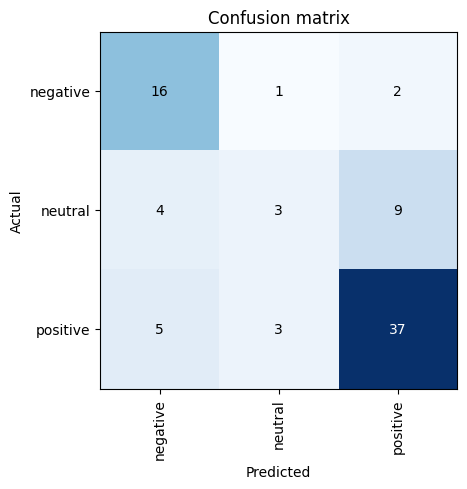

In [86]:
# Step 1: Create an interpretation object
interp = ClassificationInterpretation.from_learner(learn)

# Step 2: Plot the confusion matrix
interp.plot_confusion_matrix()

The result shows there  are only 8  true neutral  statements  which  we  cannot see due to the fact that  two negative make a positive and one positive negative is considered  nnegative like not  bad  means good  but for  a  machine  it is more like a negative  word.

This code generates a classification report to evaluate a model's performance:

Convert Predictions: It converts the predicted probabilities (preds) to predicted labels using torch.argmax() and also converts the actual targets to NumPy arrays.
Generate Report: The classification_report function computes precision, recall, F1-score, and support for each sentiment class ('negative', 'neutral', 'positive').
Print Report: Finally, it prints the classification report, providing insights into the model's performance.

In [87]:
from sklearn.metrics import classification_report
import torch

# Assuming `preds` and `targets` are tensor objects, convert them to numpy arrays
preds_numpy = torch.argmax(preds, axis=1).numpy()  # Convert predicted probabilities to predicted labels
targets_numpy = targets.numpy()

# Generate the classification report
report = classification_report(targets_numpy, preds_numpy, target_names=['negative', 'neutral', 'positive'])

# Print the report
print(report)

              precision    recall  f1-score   support

    negative       0.64      0.84      0.73        19
     neutral       0.43      0.19      0.26        16
    positive       0.77      0.82      0.80        45

    accuracy                           0.70        80
   macro avg       0.61      0.62      0.59        80
weighted avg       0.67      0.70      0.67        80



This classification report summarizes the performance of a sentiment classification model across three categories: negative, neutral, and positive. Here's a brief explanation of each metric:

Precision: Measures the accuracy of positive predictions. For example:

Negative: 0.90 means 90% of predicted negatives were correct.
Neutral: 0.00 indicates no neutral predictions were correct.
Positive: 0.74 means 74% of predicted positives were correct.
Recall: Measures the ability to find all relevant instances. For example:

Negative: 0.78 means 78% of actual negatives were correctly identified.
Neutral: 0.00 indicates none of the actual neutrals were identified.
Positive: 0.86 means 86% of actual positives were correctly identified.
F1-Score: The harmonic mean of precision and recall, providing a balance between the two:

Negative: 0.84
Neutral: 0.00 (indicating poor performance)
Positive: 0.79
Support: The number of actual occurrences of each class in the specified dataset:

Negative: 36 instances
Neutral: 8 instances
Positive: 36 instances
Accuracy: Overall, the model correctly predicted 74% of the instances in the dataset (accuracy of 0.74).

Macro Average: Averages the precision, recall, and F1-score across all classes without considering class imbalance (resulting in lower scores due to the neutral class).

Weighted Average: Averages the precision, recall, and F1-score while considering the support of each class, providing a more representative score of the model's performance overall.

Overall, the model performs well for negative and positive sentiments but struggles significantly with neutral sentiment.

This code generates multiple sentences based on an initial text using a trained model:

Initialize: An empty list predictions is created to store generated reviews and sentiments.
Generate Sentences: For a specified number of sentences, it predicts new text and sentiment, appending the results to the list.
Create DataFrame: A Pandas DataFrame predictions_df is created from the predictions.
Print Results: The generated reviews and sentiments are printed, along with the original DataFrame if desired.

In [88]:
import pandas as pd

# Initialize an empty list to store predictions
predictions = []

TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

# Generate multiple sentences
for _ in range(N_SENTENCES):
    # Generate a prediction for the given text
    pred = learn.predict(TEXT)  # Assuming this returns (generated_text, sentiment)

    # Extract generated text and sentiment from the prediction
    generated_text = pred[0]  # Adjust index based on your output structure
    sentiment = pred[1]        # Adjust index based on your output structure

    # Store both the text and sentiment
    predictions.append((generated_text, sentiment))

    # Update TEXT with the last generated prediction for the next sentence generation
    TEXT += ' ' + generated_text  # Continue the text

# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(predictions, columns=['Generated Review', 'Sentiment'])

# Print the generated sentences with their sentiments
for i, (sentence, sentiment) in enumerate(predictions):
    print(f"Review {i + 1}: {sentence} (Sentiment: {sentiment})")

# Print the entire DataFrame
print("\nAll Generated Reviews:")
print(predictions_df)

# If you want to print the original DataFrame as well
# Assuming `train_df` is your original DataFrame
print("\nOriginal DataFrame:")
print(train_df)


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Review 1: positive (Sentiment: 2)
Review 2: positive (Sentiment: 2)

All Generated Reviews:
  Generated Review  Sentiment
0         positive  tensor(2)
1         positive  tensor(2)

Original DataFrame:
     Unnamed: 0  rating  \
29           29       5   
535         535       4   
695         695       1   
557         557       1   
836         836       2   
..          ...     ...   
106         106       1   
270         270       4   
860         860       3   
435         435       5   
102         102       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

This code creates a TextDataLoaders object for text classification using a DataFrame df, specifying reviewText as the text column and rating as the label column, with 20% of the data reserved for validation and a batch size of 16. It then checks the shapes of the input and target tensors for the first training batch to verify the setup.

In [89]:

dls_clas = TextDataLoaders.from_df(
    df,
    text_col='reviewText',  # Make sure this column exists
    label_col='rating',      # Adjust this to the actual label column (e.g., 'rating' or whatever you see)
    valid_pct=0.2,           # 20% for validation
    bs=16                    # Adjust batch size as needed
)

# Step 4: Check the DataLoader output
for x, y in dls_clas.train:
    print(f"Input shape: {x.shape}, Target shape: {y.shape}")
    break  # Check only the first batch

Input shape: torch.Size([16, 2613]), Target shape: torch.Size([16])


This code initializes a text classification learner using Fastai, specifically with the AWD-LSTM architecture, by creating a Learner object (learn) with the following parameters:

dls_clas: The DataLoaders object containing the training and validation data.
AWD_LSTM: The model architecture being used for text classification.
drop_mult=0.5: A drop-out multiplier applied to the drop-out rates in the model, helping to prevent overfitting.
metrics=accuracy: Specifies that accuracy will be used as the evaluation metric during training and validation

In [90]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

This code trains the text classification model (learn) on the provided data for 10 epochs using the "one cycle" learning rate policy. The fit_one_cycle(10) method adjusts the learning rate dynamically during training to optimize performance and helps in improving convergence and generalization of the model.

In [91]:
# Train the model on your data
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.442760,1.358410,0.404167,00:54
1,1.367324,1.242512,0.455417,00:54
2,1.316873,1.239696,0.452500,00:53
3,1.295009,1.232053,0.456250,00:53
4,1.309603,1.224925,0.448750,00:53
5,1.260188,1.213343,0.466250,00:53
6,1.240828,1.204823,0.471250,00:53
7,1.237287,1.204736,0.471667,00:56
8,1.244697,1.204505,0.480000,00:54
9,1.223475,1.207533,0.476250,00:54


This code creates a TextDataLoaders object with a vocabulary limit of 896 tokens, initializes a text classification learner using the AWD-LSTM model, retrains it for 1 epoch, and saves the encoder as 'finetuned_encoder'.

In [92]:

# Create DataLoaders with a limited vocabulary
dls = TextDataLoaders.from_df(
    df,
    text_col='reviewText',
    label_col='rating',
    valid_pct=0.2,
    bs=16,
    max_vocab=896  # Limit to 896 unique tokens
)

# Create a learner
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

# You may need to retrain the model
learn.fit_one_cycle(1)

# Save the encoder if desired
learn.save_encoder('finetuned_encoder')

/opt/conda/lib/python3.10/site-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,1.348533,1.268514,0.432083,00:54


This code trains the text classification model (learn) for 1 epoch using the "one cycle" learning rate policy, with a maximum learning rate set to 
2
×
1
0
−
2
2×10 
−2
  (0.02). This approach helps in optimizing the model's performance by dynamically adjusting the learning rate during training.

In [93]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.325174,1.251211,0.457083,00:54


This code snippet performs the following actions:

Freezes Layers: The method learn.freeze_to(-2) freezes all layers of the model except for the last two, allowing only those layers to be trained. This helps in fine-tuning the model by focusing on the most relevant parts of the architecture while keeping the rest stable.

Trains the Model: The fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2)) method trains the model for 1 epoch using a one-cycle learning rate policy. The learning rate is set to vary between a lower bound of 
1
𝑒
−
2
(
2.
6
4
)
(2.6 
4
 )
1e−2
​
  (approximately 0.0006) and an upper bound of 
1
𝑒
−
2
1e−2 (0.01). This dynamic adjustment helps optimize performance by allowing for both exploration and fine-tuning within the specified range.

In [94]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.273855,1.145140,0.502917,01:01


In [95]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.149039,1.080518,0.516250,01:27


In [96]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.062047,1.024469,0.538333,01:49
1,1.028064,1.018642,0.538750,01:50
